# CS 221 Project - Finding Classification Values
This notebook determines the classification ranges for different levels of virality.

## Libraries
Using `pandas` for data analysis.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Reading in Data
Looking at the data from the Kaggle dataset.

In [2]:
main_df = pd.read_csv('../data/ted_main.csv')
transcript_df = pd.read_csv('../data/transcripts.csv')

# Look at columns
print(main_df.columns)
print(transcript_df.columns)

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')
Index(['transcript', 'url'], dtype='object')


## Verifying Usage of URLs
Making sure all URLs would be used.

In [3]:
# Iterate through the main URLs and transcript URLs
main_urls = main_df['url']
transcript_urls = transcript_df['url']
common_urls = []

# Find URLs in common
for url in main_urls:
    for other_url in transcript_urls:
        if (url == other_url):
            common_urls.append(url)

## Creating Final Main Dataframe
Creating dataframe with main entries linked to their transcripts.

In [4]:
# Mapping common URLs to thing in index dataframe
main_df["transcript"] = ""
for i in range(len(common_urls)):
    transcript_entry = transcript_df[transcript_df['url'] == common_urls[i]]
    final_transcript = transcript_entry['transcript'].values[0]
    main_df.loc[main_df['url'] == common_urls[i], 'transcript'] = final_transcript

# Remove anything with no entries
main_df = main_df[main_df['transcript'] != ""]
main_df.to_csv('../data/final_data.csv', index=False)

## Visualizing Distribution of Views
Looking at all possible TED Talks, and then going from there.

(array([ 21.,  48.,  90.,  93., 113., 135., 158., 150., 163., 176., 146.,
        133.,  96., 115.,  87.,  83.,  51.,  52.,  38.,  39.,  31.,  36.,
         28.,  16.,  30.,  22.,  18.,  14.,  13.,  11.,   9.,  13.,  12.,
          8.,   9.,   6.,   5.,  11.,   7.,   7.,   5.,  10.,   7.,   7.,
          8.,   2.,   7.,   9.,   3.,   6.,   7.,   3.,   0.,   2.,   2.,
          2.,   2.,   1.,   1.,   2.,   2.,   1.,   1.,   2.,   3.,   1.,
          1.,   4.,   2.,   1.,   1.,   0.,   2.,   0.,   0.,   3.,   1.,
          3.,   1.,   1.,   0.,   1.,   1.,   2.,   2.,   1.,   0.,   1.,
          1.,   0.,   2.,   0.,   2.,   1.,   1.,   1.,   1.,   2.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0., 

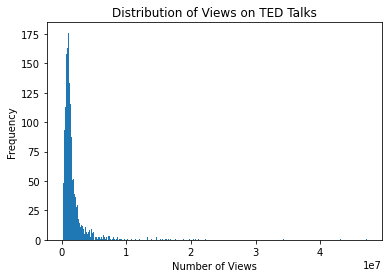

In [5]:
main_df = main_df.sort_values(by=['views'])
views = main_df['views']
plt.title("Distribution of Views on TED Talks")
plt.xlabel("Number of Views")
plt.ylabel("Frequency")
plt.hist(views, bins=500)

## Splitting Up Data into $5$ Classes
Classifying the data into different levels of virality.

In [9]:
# Create nunber of classes, class size, and total classes
num_classes = 5
class_size = int(len(views) / num_classes)
classes = [[None]] * num_classes

# Creating the individual classes
total = 0
for i in range(num_classes):
    classes[i] = views[total:total + class_size]
    total = total + class_size

## Visualize Histograms of Each Class
Finish up looking at each class.

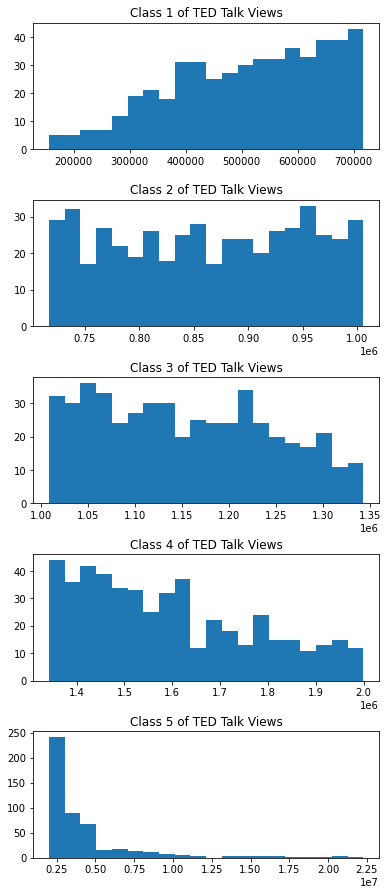

In [10]:
# Plot each of the histograms
fig, axs = plt.subplots(5)
for i in range(len(classes)):
    axs[i].set_title("Class " + str(i+1) + " of TED Talk Views")
    axs[i].hist(classes[i], bins = 20)

# Cosmetic adjustments
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Saving Data to CSV Files
Once we visualize each class, separate them to prepare for training!

In [11]:
class_size = int(len(views) / num_classes)
for i in range(num_classes):
    select_df = main_df[i * class_size:(i+1) * class_size]
    select_df.to_csv('../data/dataset/' + str(i) + '.csv', index=None)